In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Importación del Dataset

In [2]:
# Importa CSV del dataset crudo
df = pd.read_csv('datasets/spotify_songs.csv')

### Fuentes

__*Original dataset:*__

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

__*API scraper repository:*__

https://github.com/charlie86/spotifyr/

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | Describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos bailable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


## Exploración y Comprensión de los Datos

In [3]:
dataset_count = []
dataset_count.append(len(df))
print(f"El dataset está compuesto por {dataset_count[0]} entradas.")

El dataset está compuesto por 32833 entradas.


In [4]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
df.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [7]:
df.tail(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.150,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.343,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.742,0.0894,127.984,337500


In [8]:
# Vemos la cantidad de valores nulos por cada campo
null_counts = df.isnull().sum()
print(null_counts)
"""
plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=90)
plt.show()
"""

track_id            0
track_name          5
track_artist        5
track_popularity    0
track_album_id      0
                   ..
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
Length: 23, dtype: int64


"\nplt.figure(figsize=(12, 6))\nsns.barplot(x=null_counts.index, y=null_counts.values)\nplt.title('Cantidad de Valores Nulos por Columna')\nplt.xlabel('Columnas')\nplt.ylabel('Cantidad de Valores Nulos')\nplt.xticks(rotation=90)\nplt.show()\n"

Se identifican 5 pistas que no tienen información de 'track_name' y 'track_artist', posiblemente se trata de las mismas canciones.

In [9]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


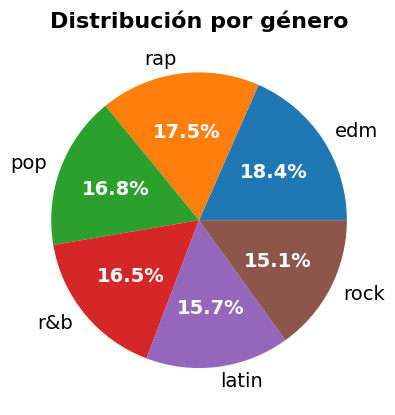

In [10]:
# Estudiamos la distrubición por género
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribución por género', fontsize=16, fontweight='bold')
plt.show()

El dataset se encuentra distribuido uniformemente para cada género.

## Limpieza del Dataset

### Tratamiento de valores nulos

In [11]:
# Se eliminan los valores nulos
df = df.dropna()

In [12]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


#### Resultado del proceso

In [13]:
# Resultado del Tratamiento Nulos
dataset_count.append(len(df))
i = len(dataset_count)-1
reduction_0 = 100*((dataset_count[i] / dataset_count[0]) - 1)
reduction = 100*((dataset_count[i] / dataset_count[i-1]) - 1)
reduction_num = dataset_count[i-1] - dataset_count[i]

print(f"El dataset actual está compuesto por {dataset_count[i]} entradas.")
print(f"El proceso actual eliminó {reduction_num} valores adicionales ({reduction_0:.2f}%)")
#print(f"Se ha reducido el set de datos en un {reduction_0:.2f}%.")

El dataset actual está compuesto por 32828 entradas.
El proceso actual eliminó 5 valores adicionales (-0.02%)


### Tratamiento de duplicados

Verificamos si había canciones ingresadas más de una vez al dataset (mismo track_id) y eliminamos los duplicados.

In [14]:
# Búsqueda de duplicados
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
3eekarcy7kvN4yt5ZFzltW     9
14sOS5L36385FJ3OL8hew4     9
0qaWEvPkts34WF68r8Dzx9     8
6oJ6le65B3SEqPwMRNXWjY     8
                          ..
7iNIg7XDEaYECfWD5dJ9Va     2
1BmdqDrBU5eohtRwHBls6C     2
5N5k9nd479b1xpDZ4usjrg     2
5scxjvcdozadBoRRN0UMaM     2
4JxXwBcVpVGDAnY4tKcAFH     2
Name: count, Length: 3165, dtype: int64


In [15]:
df.loc[df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,post-teen pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,electropop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,indie poptimism,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,southern hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,tropical,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,hip pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,pop edm,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960


Pudimos ver que las entradas duplicadas están en diferentes playlists, pero se trata siempre de la misma canción, con los mismos features musicales.

El único valor conflictivo es 'playlist_genre' ya que no necesariemente es descriptivo del género real de la canción. Decidimos conservar sólo la primer entrada a modo descriptivo.

In [16]:
# Eliminación de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [17]:
# Verificación
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

Series([], Name: count, dtype: int64)


#### Resultado del proceso

In [18]:
# Resultado del Tratamiento Duplicados
dataset_count.append(len(df))
i = len(dataset_count)-1
reduction_0 = 100*((dataset_count[i] / dataset_count[0]) - 1)
reduction = 100*((dataset_count[i] / dataset_count[i-1]) - 1)
reduction_num = dataset_count[i-1] - dataset_count[i]

print(f"El dataset actual está compuesto por {dataset_count[i]} entradas.")
print(f"El proceso actual eliminó {reduction_num} valores adicionales ({reduction:.2f}%)")
print(f"Se ha reducido el set de datos en un {reduction_0:.2f}%.")

El dataset actual está compuesto por 28352 entradas.
El proceso actual eliminó 4476 valores adicionales (-13.63%)
Se ha reducido el set de datos en un -13.65%.


### Tratamiento de outliers

#### Variable track_popularity

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deberse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoción, artista desconocido) que exceden la información del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlación.

In [19]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28352, dtype: bool


2616

Con base en el histograma anterior de distribución de 'track_popularity' se determinó realizar un corte de los valores menores a 10, por ser el límite de separación de ambos picos.

In [20]:
# Eliminamos las canciones con track_popularity menor a 10
df = df[df['track_popularity'] > 10]

In [21]:
# Verificamos la eliminación de canciones con track_popularity menor a 10
unpopular_counts = df['track_popularity'] < 10
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

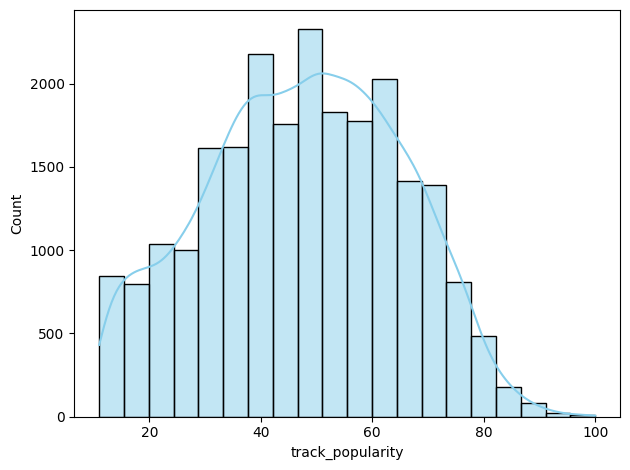

In [22]:
# Verificamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

#### Resultado del proceso

In [23]:
# Resultado de Eliminación track_popularity ~0
dataset_count.append(len(df))
i = len(dataset_count)-1
reduction_0 = 100*((dataset_count[i] / dataset_count[0]) - 1)
reduction = 100*((dataset_count[i] / dataset_count[i-1]) - 1)
reduction_num = dataset_count[i-1] - dataset_count[i]

print(f"El dataset actual está compuesto por {dataset_count[i]} entradas.")
print(f"El proceso actual eliminó {reduction_num} valores adicionales ({reduction:.2f}%)")
print(f"Se ha reducido el set de datos en un {reduction_0:.2f}%.")

El dataset actual está compuesto por 23196 entradas.
El proceso actual eliminó 5156 valores adicionales (-18.19%)
Se ha reducido el set de datos en un -29.35%.


#### Variable tempo

In [24]:
# Detección de outliers por método del desvío estándar.
data = df['tempo']
data_mean, data_std = np.mean(data), np.std(data)
cutoff = data_std*3
lower,upper = data_mean-cutoff, data_mean+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Copiamos el DataFrame original para comparar
df_original = df.copy()

# Eliminamos las canciones con tempo fuera de los límites establecidos
df = df[(df['tempo'] > lower) & (df['tempo'] < upper)]

print(f"Limite de corte inferior {round(lower,2)} bpm.")
print(f"Limite de corte superior {round(upper,2)} bpm.")
print(f"Se eliminan {len(outliers_idx)} entradas que exceden los límites de tempo.")

Limite de corte inferior 39.69 bpm.
Limite de corte superior 202.22 bpm.
Se eliminan 72 entradas que exceden los límites de tempo.


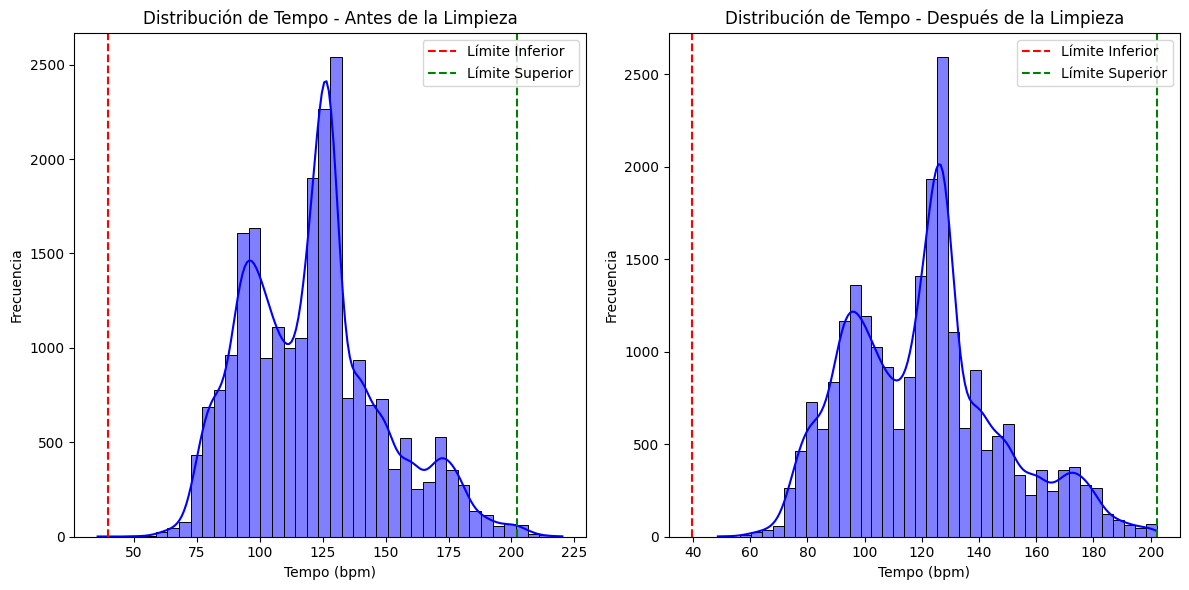

In [25]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Distribución de Tempo - Antes de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Distribución de Tempo - Después de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable duracion_ms

In [26]:
# Detección de outliers con método del rango intercuartílico (IQR)
# Análisis por cuartiles
df_original = df.copy()
data = df['duration_ms']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower,upper = q25-cutoff, q75+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Análisis por percentiles
q15, q85 = np.percentile(data, 15), np.percentile(data, 85)
iqr_per = q85 - q15
cutoff_per = iqr * 1.5
lower_per,upper_per = q15-cutoff_per, q85+cutoff_per
outliers_idx_per = np.argwhere((data<lower_per) | (data>upper_per))

In [27]:
print('Análisis por cuartiles:')
print('Límite inferior ',lower)
print('Límite superior ',upper)

Análisis por cuartiles:
Límite inferior  88289.75
Límite superior  347783.75


In [28]:
print('Análisis por percentiles:')
print('Límite inferior ',lower_per)
print('Límite superior ',upper_per)

Análisis por percentiles:
Límite inferior  73305.0
Límite superior  372711.8


Decidimos realizar el corte únicamente por el percentil inferior. Es decir, pistas con una duración menor a 1,2 min.

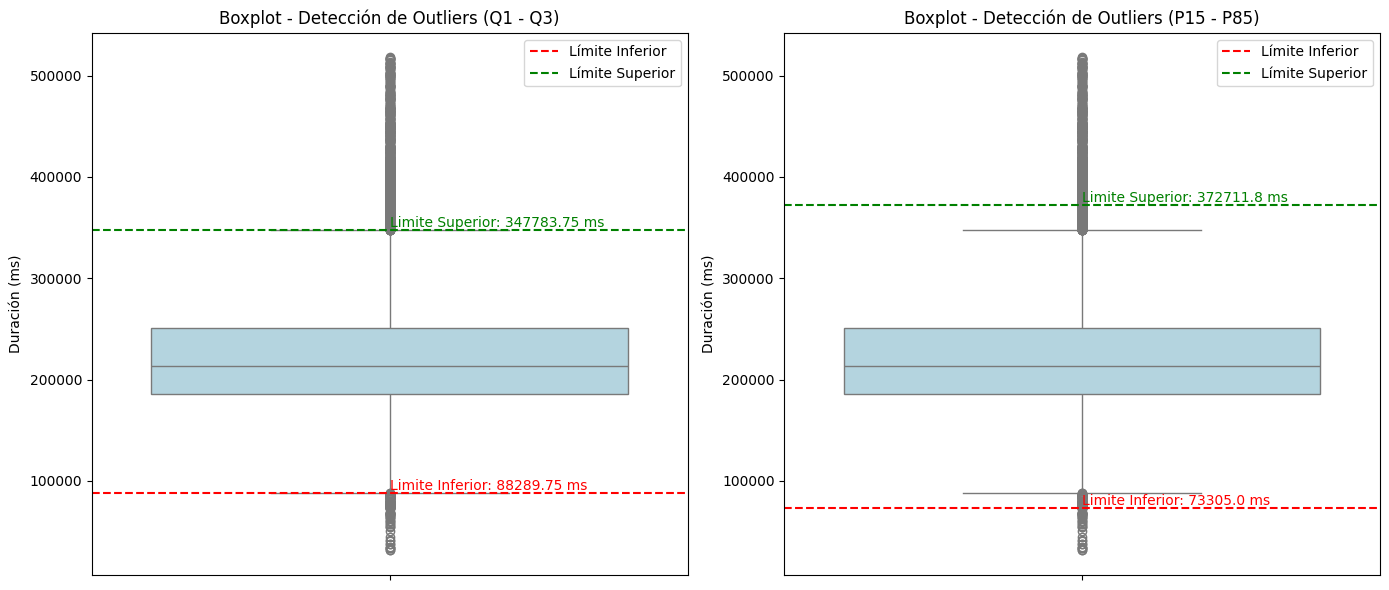

In [29]:
# Crear el gráfico
plt.figure(figsize=(14, 6))

# Boxplot para el análisis IQR
plt.subplot(1, 2, 1)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Boxplot - Detección de Outliers (Q1 - Q3)')
plt.ylabel('Duración (ms)')
plt.legend()

# Agregar texto con los valores límites
plt.text(0, lower, f'Limite Inferior: {round(lower, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper, f'Limite Superior: {round(upper, 2)} ms', color='green', verticalalignment='bottom')

# Boxplot para el análisis por percentiles
plt.subplot(1, 2, 2)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower_per, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(upper_per, color='green', linestyle='--', label='Límite Superior')
plt.title('Boxplot - Detección de Outliers (P15 - P85)')
plt.ylabel('Duración (ms)')
plt.legend()

# Agregar texto con los valores límites para percentiles
plt.text(0, lower_per, f'Limite Inferior: {round(lower_per, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper_per, f'Limite Superior: {round(upper_per, 2)} ms', color='green', verticalalignment='bottom')

plt.tight_layout()
plt.show()

In [30]:
# Eliminamos las canciones con duración fuera de los límites establecidos
df = df[df['duration_ms'] > lower_per]
outliers_idx_per = np.argwhere(data<lower_per)
print(f"Limite de corte inferior {round(lower_per,2)} ms.")
print(f"Se eliminan {len(outliers_idx_per)} entradas por debajo del límite de duración.")

Limite de corte inferior 73305.0 ms.
Se eliminan 39 entradas por debajo del límite de duración.


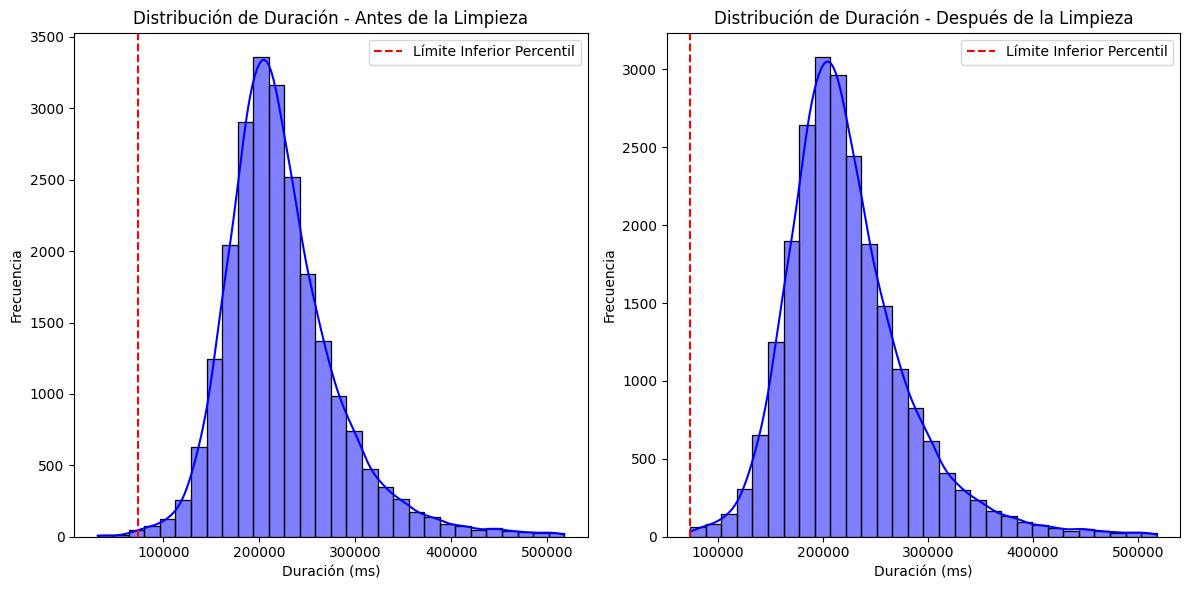

In [31]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='Límite Inferior Percentil')
plt.title('Distribución de Duración - Antes de la Limpieza')
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='Límite Inferior Percentil')
plt.title('Distribución de Duración - Después de la Limpieza')
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable loudness

Identificamos que algunos outliers en la variable loudness, que presentaban pistas con un "volumen" extremadamente bajo.

In [32]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
df_original = df.copy()
loudness_threshold = -30
low_loudness_counts = df['loudness'] < loudness_threshold
print(low_loudness_counts)
print(f"Se identifica un total de {low_loudness_counts.sum()} pistas.")

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23085, dtype: bool
Se identifica un total de 4 pistas.


In [33]:
df[df['loudness'] < loudness_threshold]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
17008,34v7cD6VR3fVYguedQ1wuh,Tropical Forest,The Sleep Specialist,54,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.3110,0.377000,3,-36.509,0,0.0366,0.1290,0.979,0.2470,0.0388,84.122,117449
17010,28ilcqErfNjitJ7T3byHoX,Peaceful Forest,The Sleep Specialist,51,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.2110,0.425000,7,-46.448,0,0.0542,0.8800,0.613,0.1840,0.0122,116.884,181204
17016,61SiFnjiY36uVSTBVXK5Yw,The Sound Of The Jungle With Coloured Birds Fo...,Life Sounds Nature,44,5qukUq6sBLjghcEcFOdgKP,"The Very Best Sound Of Nature - Birds, Waves, ...",2015-04-01,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.2260,0.442000,11,-36.624,0,0.0562,0.0509,0.136,0.0791,0.0234,77.998,93010
17018,5iAB4tlYseBES4MKqgY4KG,Relaxing Crickets And Waterfall,Natural Sound Makers,52,2GLxsxoWpW8MOw9O9AAsf9,Forest By Night,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.0787,0.000175,7,-35.960,1,0.0580,0.1180,0.972,0.0793,0.0116,169.062,264154


Decidimos eliminarlos por no tratarse de pistas musicales, son grabaciones de sonidos de la naturaleza.

In [34]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > loudness_threshold ]

In [35]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23081, dtype: bool


0

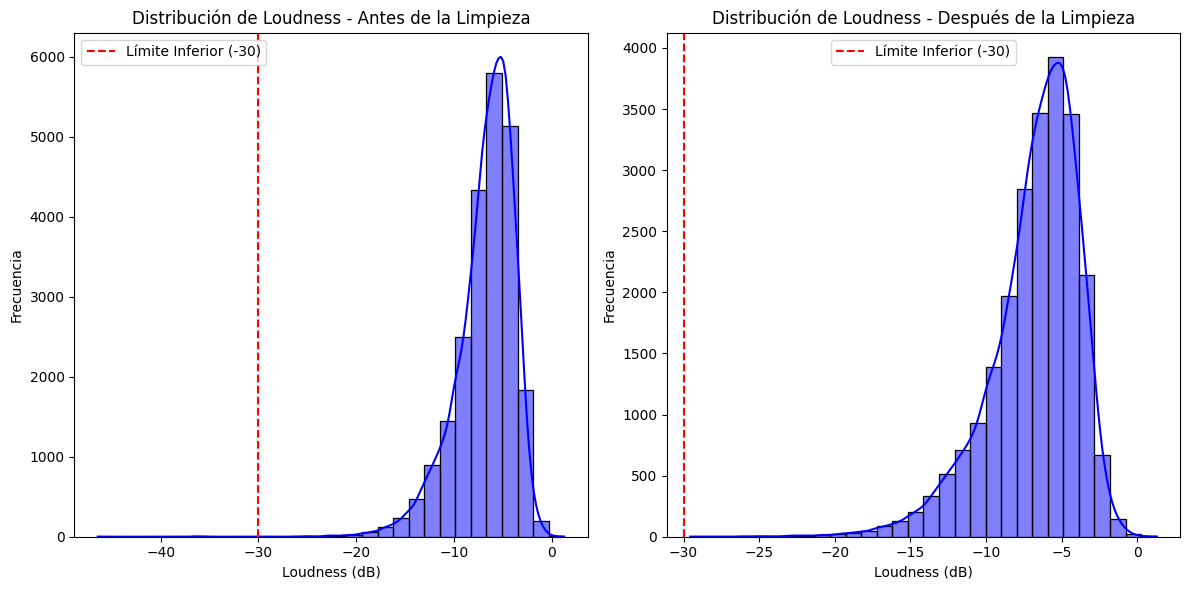

In [36]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='Límite Inferior (-30)')
plt.title('Distribución de Loudness - Antes de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='Límite Inferior (-30)')
plt.title('Distribución de Loudness - Después de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Resultado del proceso

In [37]:
# Resultado del Tratamiento Outliers
dataset_count.append(len(df))
i = len(dataset_count)-1
reduction_0 = 100*((dataset_count[i] / dataset_count[0]) - 1)
reduction = 100*((dataset_count[i] / dataset_count[i-1]) - 1)
reduction_num = dataset_count[i-1] - dataset_count[i]

print(f"El dataset actual está compuesto por {dataset_count[i]} entradas.")
print(f"El proceso actual eliminó {reduction_num} valores adicionales ({reduction:.2f}%)")
print(f"Se ha reducido el set de datos en un {reduction_0:.2f}%.")

El dataset actual está compuesto por 23081 entradas.
El proceso actual eliminó 115 valores adicionales (-0.50%)
Se ha reducido el set de datos en un -29.70%.


## Transformación de Variables y Selección de Features

### Construcción de features

In [38]:
# Convert the 'mode' from integer to boolean
df['mode'] = df['mode'].astype(bool)

In [39]:
#Optimización de la creación del feature 'year' utilizando pandas para evitar usar .apply()

# Convierte toda la columna a datetime de una vez, extrayendo solo el año
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Reemplaza los años que ya estaban en formato de 4 dígitos (para evitar coerción innecesaria)
df['year'] = df['year'].fillna(df['track_album_release_date'].where(df['track_album_release_date'].str.len() == 4))

df['year'] = df['year'].fillna(df['track_album_release_date'].str[:4].where(df['year'].isnull()))

# Asegúrate de que todos los valores en 'year' son numéricos o NaN
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [40]:
# Verificamos que el campo "Año de lanzamiento" se haya creado adecuadamente para todas las entradas
null_data = df[df['year'].isnull()]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year


### Eliminación de features

Eliminamos los features string que describen la pista, el album o la playlist. Únicamente conservamos 'track_id' para referencia y 'playlist_genre' que será usada más adelante.

In [41]:
df.drop(columns=['track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_subgenre'], inplace=True)

In [42]:
# Se elimina la información de tonalidad por no ser relevante para nuestro modelo.
df.drop(columns=['key'], inplace=True)

### Escalado de features numéricas

Realizamos un escalado 'MinMaxScaler' para trabajar con valores de rango [0, 1] en todas las features.

In [43]:
# Escalado de variables
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000
mean,0.411510,0.656292,0.692901,0.737928,0.107680,0.183468,0.085304,0.188438,0.509312,0.469421,0.336007,0.864567
std,0.197534,0.145038,0.183074,0.096845,0.102151,0.225487,0.225892,0.152531,0.232680,0.173978,0.131468,0.181737
min,0.000000,0.077100,0.011800,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.564000,0.573000,0.690556,0.040900,0.016100,0.000000,0.092700,0.329000,0.334020,0.252155,0.825397
50%,0.415730,0.673000,0.716000,0.755643,0.062400,0.085800,0.000016,0.126000,0.510000,0.477115,0.315769,0.952381
75%,0.561798,0.762000,0.836000,0.805520,0.133000,0.272000,0.004810,0.243000,0.691000,0.558260,0.398182,0.984127
max,1.000000,0.983000,1.000000,1.000000,0.918000,0.992000,0.994000,0.996000,0.991000,1.000000,1.000000,1.000000


### Corrección de skewness

Aplicamos un proceso de corrección del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature numérico intentando aproximarlo a una distribución gausiana. Se utiliza la transformación que mejor se adapta a los datos.

In [44]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])

def remove_skewness(feature, df_scaled):

    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]
    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []

#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df_scaled[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  
skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]

#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)
"""
#Graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()
"""

"\n#Graficamos\nfig, ax = plt.subplots(figsize=(10, 6))\nbar_width = 0.4\nindex = range(len(skew_df))\nbars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')\nbars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')\nax.set_xlabel('Features')\nax.set_ylabel('Skewness')\nax.set_title('Skewness antes y despues de la transformación')\nax.set_xticks([i + bar_width / 2 for i in index])\nax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')\nax.legend()\nplt.tight_layout()\nplt.show()\n"

#### Resultado del proceso

In [45]:
# Resultado de Eliminación track_popularity ~0
dataset_count.append(len(df))
i = len(dataset_count)-1
reduction_0 = 100*((dataset_count[i] / dataset_count[0]) - 1)
reduction = 100*((dataset_count[i] / dataset_count[i-1]) - 1)
reduction_num = dataset_count[i-1] - dataset_count[i]

print(f"El dataset actual está compuesto por {dataset_count[i]} entradas.")
print(f"El proceso actual eliminó {reduction_num} valores adicionales ({reduction:.2f}%)")
print(f"Se ha reducido el set de datos en un {reduction_0:.2f}%.")

El dataset actual está compuesto por 23081 entradas.
El proceso actual eliminó 0 valores adicionales (0.00%)
Se ha reducido el set de datos en un -29.70%.


## Exportación

In [46]:
df_scaled.describe()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000
mean,0.411510,0.451754,0.513626,0.421495,0.098426,0.152717,0.065676,0.165481,0.509312,0.469421,0.285104,0.720546
std,0.197534,0.181832,0.236740,0.141470,0.085541,0.171373,0.167241,0.115768,0.232680,0.173978,0.094592,0.291073
min,0.000000,0.005944,0.000139,0.000000,0.022153,0.000001,0.000000,0.009316,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.318096,0.328329,0.329304,0.040086,0.015972,0.000000,0.088652,0.329000,0.334020,0.224866,0.562326
50%,0.415730,0.452929,0.512656,0.431469,0.060530,0.082317,0.000016,0.118672,0.510000,0.477115,0.274422,0.863838
75%,0.561798,0.580644,0.698896,0.522671,0.124869,0.240590,0.004798,0.217528,0.691000,0.558260,0.335173,0.953133
max,1.000000,0.966289,1.000000,1.000000,0.651283,0.689139,0.690143,0.691145,0.991000,1.000000,0.693147,1.000000


In [47]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23081 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          23081 non-null  object 
 1   track_name        23081 non-null  object 
 2   track_artist      23081 non-null  object 
 3   track_popularity  23081 non-null  float64
 4   track_album_id    23081 non-null  object 
 5   track_album_name  23081 non-null  object 
 6   playlist_genre    23081 non-null  object 
 7   danceability      23081 non-null  float64
 8   energy            23081 non-null  float64
 9   loudness          23081 non-null  float64
 10  mode              23081 non-null  bool   
 11  speechiness       23081 non-null  float64
 12  acousticness      23081 non-null  float64
 13  instrumentalness  23081 non-null  float64
 14  liveness          23081 non-null  float64
 15  valence           23081 non-null  float64
 16  tempo             23081 non-null  float64
 17

In [48]:
# Se exporta el dataset dataset escalado con selección de features
df_scaled.to_csv('datasets/df_songs.csv', index=False)